In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')   # ignore worming

data_customers_sample = pd.read_csv('customers_sample.csv')
data_baskets_sample = pd.read_csv('baskets_sample.csv')
data_category_spends_sample = pd.read_csv('category_spends_sample.csv')
data_lineitems_sample = pd.read_csv('lineitems_sample.csv')

In [2]:
print(data_baskets_sample.basket_quantity.min())
print(data_baskets_sample.basket_spend.min())

-11
-£0.12


In [3]:
# Remove '£'  and change the data type into float
data_baskets_sample['basket_spend'] = data_baskets_sample['basket_spend'].str.replace('£', '').astype(float)

# Convert negative data(Unrealistic) to positive
data_baskets_sample = data_baskets_sample[(data_baskets_sample['basket_quantity']>0)]
data_baskets_sample = data_baskets_sample[(data_baskets_sample['basket_spend']>0)]

In [4]:
print(data_baskets_sample.basket_quantity.min())
print(data_baskets_sample.basket_spend.min())

1
0.01


In [5]:
# Check missing values

In [6]:
data_customers_sample.isnull().any()

customer_number     False
baskets             False
total_quantity      False
average_quantity    False
total_spend         False
average_spend       False
dtype: bool

In [7]:
data_baskets_sample.isnull().any()

customer_number      False
purchase_time        False
basket_quantity      False
basket_spend         False
basket_categories    False
dtype: bool

In [8]:
data_category_spends_sample.isnull().any()

customer_number         False
BAKERY                  False
CASHPOINT               False
CONFECTIONARY           False
DAIRY                   False
DELI                    False
DISCOUNT_BAKERY         False
DRINKS                  False
FROZEN                  False
FRUIT_VEG               False
GROCERY_FOOD            False
GROCERY_HEALTH_PETS     False
LOTTERY                 False
MEAT                    False
NEWSPAPERS_MAGAZINES    False
PRACTICAL_ITEMS         False
PREPARED_MEALS          False
SEASONAL_GIFTING        False
SOFT_DRINKS             False
TOBACCO                 False
WORLD_FOODS             False
dtype: bool

In [9]:
data_lineitems_sample.isnull().any()

customer_number    False
purchase_time      False
product_id         False
category           False
quantity           False
spend              False
dtype: bool

In [10]:
# Get familiar with the data

In [11]:
data_baskets_sample.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1


In [12]:
data_customers_sample.head()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,14,56,531,9.48,675.72,12.07
1,45,33,655,19.85,585.73,17.75
2,52,59,294,4.98,222.18,3.77
3,61,37,499,13.49,547.87,14.81
4,63,48,281,5.85,293.34,6.11


In [13]:
data_category_spends_sample.head()

,customer_number,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,...,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
0,14,7.40,0.0,25.53,236.09,0.00,1.25,189.8,20.57,14.48,...,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.0,33.66
1,45,9.45,0.0,126.32,181.58,0.00,0.00,0.0,4.51,30.21,...,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.0,4.37
2,52,1.04,0.0,3.29,5.19,26.24,0.00,0.0,1.78,56.27,...,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.0,54.90
3,61,14.08,0.0,69.29,61.15,3.81,0.00,13.0,21.96,83.74,...,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.0,1.19
4,63,12.12,0.0,75.66,43.60,11.67,0.00,0.0,3.88,22.01,...,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.0,5.79


In [14]:
data_lineitems_sample.head()

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50
3,2649,2007-03-12 16:05:00,34890,BAKERY,1,£0.57
4,859,2007-03-10 09:53:00,613984,BAKERY,1,£1.59


In [15]:
print(data_baskets_sample.shape)
print(data_customers_sample.shape)
print(data_category_spends_sample.shape)
print(data_lineitems_sample.shape)

(195371, 5)
(3000, 6)
(3000, 21)
(1461315, 6)


In [16]:
# Base Summary section

In [17]:
data_category_spends_sample = data_category_spends_sample.drop(columns=['customer_number'])

In [18]:
# The total spend of customers purchases for different categories of items
data_category_spends_sample.loc["sum"] = data_category_spends_sample.apply(lambda x:sum(x),axis=0)
data_category_spends_sample.loc["sum"].sort_values(ascending=False)

DAIRY                   283226.51
GROCERY_FOOD            243096.92
FRUIT_VEG               241418.36
CONFECTIONARY           238743.79
TOBACCO                 187742.24
DRINKS                  150558.13
GROCERY_HEALTH_PETS     117368.14
MEAT                    107317.15
CASHPOINT                70691.23
FROZEN                   70462.71
PREPARED_MEALS           61633.22
BAKERY                   59677.53
SOFT_DRINKS              45872.77
NEWSPAPERS_MAGAZINES     23524.66
LOTTERY                  22228.90
DELI                     21111.90
SEASONAL_GIFTING         19058.33
WORLD_FOODS              17468.80
PRACTICAL_ITEMS           5082.39
DISCOUNT_BAKERY           4821.55
Name: sum, dtype: float64

In [19]:
# Number of transactions of customers purchases for different categories of items
data_lineitems_sample.category.value_counts()

FRUIT_VEG               200880
DAIRY                   184139
CONFECTIONARY           171323
GROCERY_FOOD            164854
GROCERY_HEALTH_PETS     123198
BAKERY                  114874
NEWSPAPERS_MAGAZINES     74733
PREPARED_MEALS           64722
SOFT_DRINKS              60725
FROZEN                   59106
MEAT                     56849
TOBACCO                  49506
DRINKS                   37470
DELI                     30788
WORLD_FOODS              28010
LOTTERY                  16668
CASHPOINT                10103
SEASONAL_GIFTING          6799
DISCOUNT_BAKERY           3771
PRACTICAL_ITEMS           2797
Name: category, dtype: int64

In [20]:
# the last order date
data_baskets_sample['purchase_time'].max()

'2007-08-31 21:55:00'

In [21]:
import datetime as dt
now = dt.datetime(2007,9,2)

In [22]:
# Convert purchase_time to date format according to the specified format
data_baskets_sample['purchase_time'] = pd.to_datetime(data_baskets_sample['purchase_time'])

In [23]:
data_baskets_sample

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,9.66,3
195543,1988,2007-08-31 21:45:00,12,14.98,6
195544,3028,2007-08-31 21:46:00,6,6.21,2
195545,7191,2007-08-31 21:46:00,7,6.30,3


In [24]:
rfmTable = data_baskets_sample.groupby('customer_number').agg({'purchase_time':lambda x: (now-x.max()).days,
                                                               'customer_number':lambda x:len(x), 
                                                               'basket_spend':lambda x:x.sum()})

rfmTable = rfmTable[['purchase_time', 'customer_number', 'basket_spend']]
rfmTable.columns = ['Recency', 'Frequency', 'Monetary_value']
rfmTable.reset_index()
rfmTable

,Recency,Frequency,Monetary_value
customer_number,,,
14,2,56,675.72
45,2,33,585.73
52,3,59,222.18
61,4,37,547.87
63,8,48,293.34
...,...,...,...
16295,1,54,679.70
16301,5,42,251.43
16303,12,56,354.32


In [25]:
rfmTable.shape

(3000, 3)

In [26]:
# normalize the data
import numpy as np 
from pandas import Series, DataFrame

logged_data = np.log(rfmTable)
logged_data.index = Series(range(0,3000))
print(logged_data)

       Recency  Frequency  Monetary_value
0     0.693147   4.025352        6.515779
1     0.693147   3.496508        6.372859
2     1.098612   4.077537        5.403488
3     1.386294   3.610918        6.306038
4     2.079442   3.871201        5.681332
...        ...        ...             ...
2995  0.000000   3.988984        6.521652
2996  1.609438   3.737670        5.527165
2997  2.484907   4.025352        5.870200
2998  2.397895   3.367296        6.137317
2999  0.000000   2.833213        5.800304

[3000 rows x 3 columns]


In [27]:
# use silhouette_score to determine the number of groups
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(5,8))
range_score=[]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters).fit(logged_data)
    
    preds = clusterer.predict(logged_data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(logged_data, preds, metric='euclidean')
    range_score.append(score)
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

For n_clusters = 5. The average silhouette_score is : 0.2894079283442937)
For n_clusters = 6. The average silhouette_score is : 0.2886806578467825)
For n_clusters = 7. The average silhouette_score is : 0.28496473484164586)


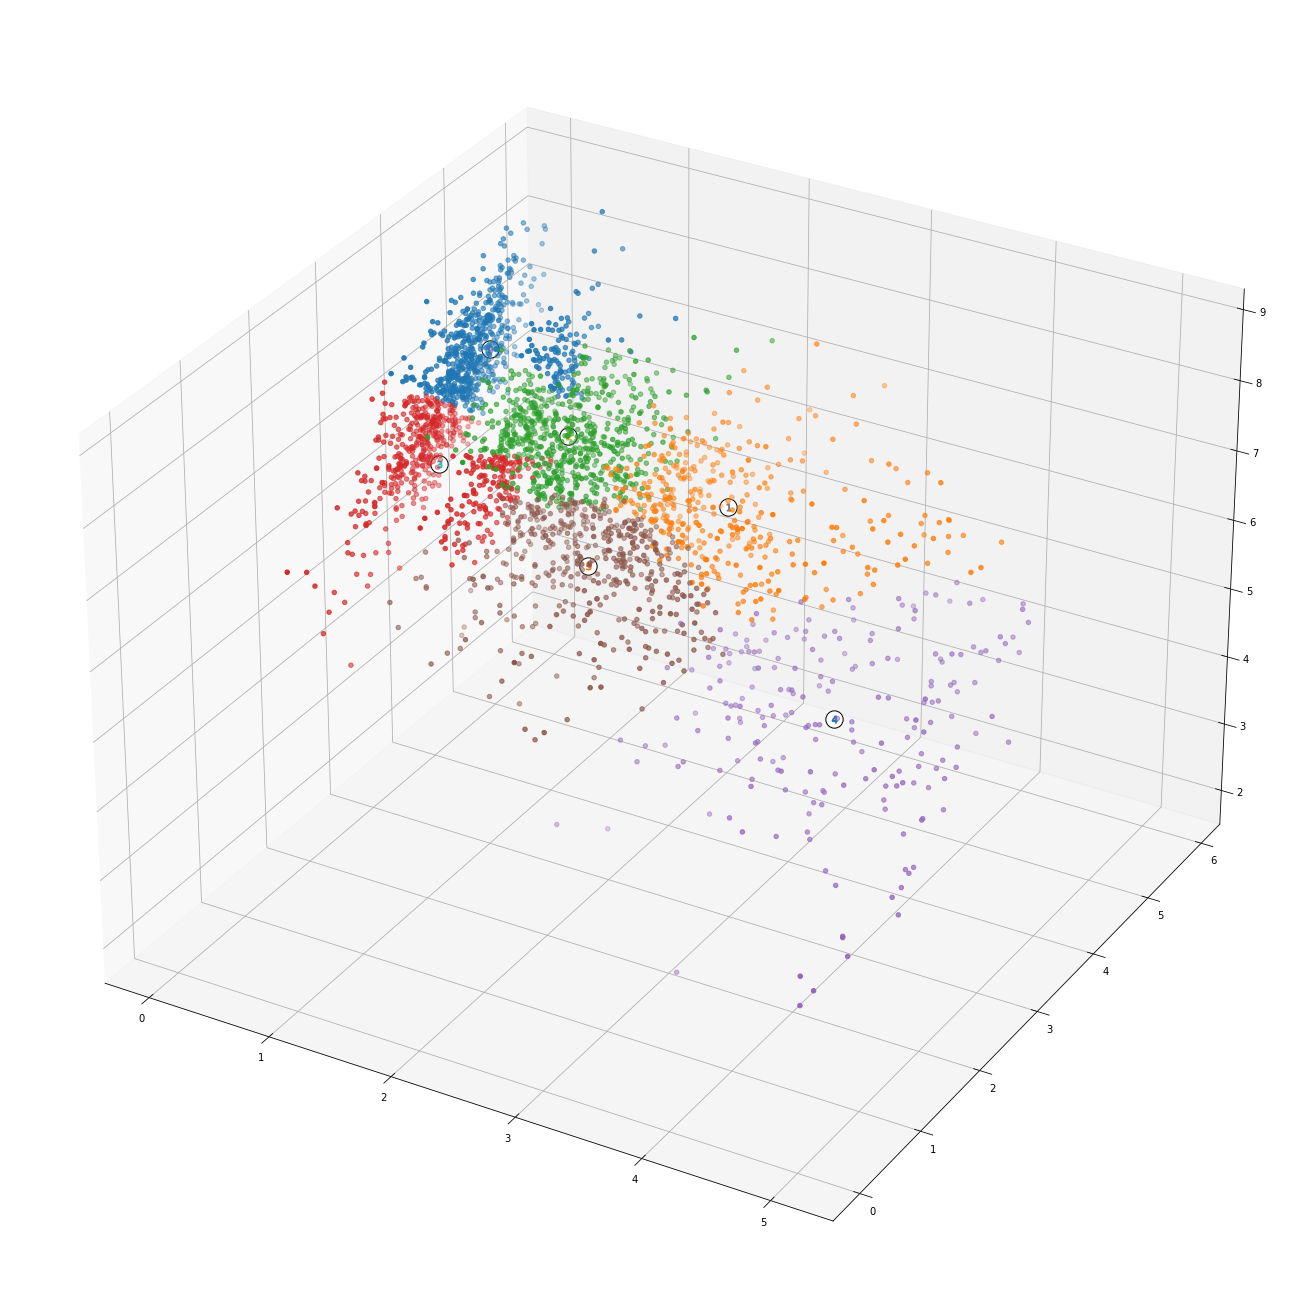

In [29]:
# clustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
plt.rcParams['figure.figsize'] = (20.0, 18.0)

clusterer = KMeans(n_clusters=6).fit(logged_data)
preds = clusterer.predict(logged_data)
centres = clusterer.cluster_centers_
assignments = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([logged_data, assignments], axis = 1)

for i, c in plot_data.groupby('Cluster'):

    ax.scatter(c['Recency'], c['Frequency'], c['Monetary_value'])

for i, c in enumerate(centres):
    ax.scatter(xs = c[0], ys = c[1], zs=c[2], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    ax.scatter(xs = c[0], ys = c[1], zs=c[2], marker='${}$'.format(i), alpha = 1, s=50);
    
plt.show()

 quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

In [30]:
# Detailed description of the six groups
final_assigments = pd.concat([assignments, rfmTable], axis = 1)

for c, d in final_assigments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

SEGMENT 0.0


,Cluster,Recency,Frequency,Monetary_value
count,676.0,120.000000,120.000000,120.000000
mean,0.0,9.583333,62.883333,688.202000
std,0.0,22.714739,44.860790,461.820808
min,0.0,1.000000,5.000000,69.470000
25%,0.0,1.000000,31.000000,388.907500
50%,0.0,3.000000,51.500000,603.055000
75%,0.0,5.500000,80.000000,869.422500
max,0.0,147.000000,229.000000,2785.030000


SEGMENT 1.0


,Cluster,Recency,Frequency,Monetary_value
count,393.0,76.000000,76.000000,76.000000
mean,1.0,10.552632,57.868421,596.576316
std,0.0,24.336746,37.246688,330.810628
min,1.0,1.000000,6.000000,47.480000
25%,1.0,1.000000,31.750000,361.420000
50%,1.0,2.000000,47.000000,530.760000
75%,1.0,7.000000,79.000000,799.822500
max,1.0,162.000000,169.000000,1700.090000


SEGMENT 2.0


,Cluster,Recency,Frequency,Monetary_value
count,680.0,125.000000,125.000000,125.000000
mean,2.0,7.240000,56.528000,716.599360
std,0.0,15.124963,35.720821,426.030552
min,2.0,1.000000,4.000000,113.930000
25%,2.0,1.000000,31.000000,401.930000
50%,2.0,2.000000,47.000000,637.970000
75%,2.0,7.000000,74.000000,932.520000
max,2.0,115.000000,199.000000,2365.360000


SEGMENT 3.0


,Cluster,Recency,Frequency,Monetary_value
count,567.0,127.000000,127.000000,127.000000
mean,3.0,10.023622,60.551181,699.398504
std,0.0,24.886876,40.928065,436.310494
min,3.0,1.000000,6.000000,105.360000
25%,3.0,1.000000,30.500000,364.565000
50%,3.0,3.000000,54.000000,577.650000
75%,3.0,7.000000,80.000000,917.070000
max,3.0,145.000000,183.000000,2119.470000


SEGMENT 4.0


,Cluster,Recency,Frequency,Monetary_value
count,212.0,41.000000,41.000000,41.000000
mean,4.0,7.463415,46.414634,679.023171
std,0.0,8.348945,24.560105,464.472181
min,4.0,1.000000,11.000000,131.070000
25%,4.0,2.000000,27.000000,438.040000
50%,4.0,4.000000,44.000000,542.280000
75%,4.0,8.000000,59.000000,704.250000
max,4.0,34.000000,116.000000,2045.280000


SEGMENT 5.0


,Cluster,Recency,Frequency,Monetary_value
count,472.0,79.000000,79.000000,79.000000
mean,5.0,7.468354,55.430380,697.492405
std,0.0,18.068839,43.933424,426.936688
min,5.0,1.000000,1.000000,73.750000
25%,5.0,1.000000,30.000000,408.595000
50%,5.0,3.000000,42.000000,547.990000
75%,5.0,6.500000,66.000000,956.195000
max,5.0,149.000000,258.000000,2177.420000


In [31]:
final_assigments.describe()

,Cluster,Recency,Frequency,Monetary_value
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.220667,9.121667,65.123667,769.758087
std,1.694775,20.938489,47.392134,552.972322
min,0.000000,1.000000,1.000000,7.280000
25%,1.000000,1.000000,32.000000,406.707500
50%,2.000000,3.000000,53.000000,627.170000
75%,3.000000,7.000000,86.000000,958.660000
max,5.000000,165.000000,374.000000,6588.650000


In [81]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Frequency': {0.25: 32.0, 0.5: 53.0, 0.75: 86.0},
 'Monetary_value': {0.25: 406.7075,
  0.5: 627.1700000000001,
  0.75: 958.6600000000001}}

In [35]:
output = final_assigments[['Cluster']]
output

,Cluster
0,2.0
1,3.0
2,5.0
3,2.0
4,5.0
...,...
16295,NaN
16301,NaN
16303,NaN
16306,NaN


In [36]:
output.to_csv('/Users/gavinshi/Desktop/Analytics Specializations 4392.csv')

In [83]:
# Our aim is to find customers who have lowest recency, and high monetary value and frequency.
def RScore(x, p, quantiles):
    if x < quantiles[p][0.25]:
        return 4
    elif x <= quantiles[p][0.5]:
        return 3
    elif x <= quantiles[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 1
    elif x<=quantiles[p][0.5]:
        return 2
    elif x<=quantiles[p][0.75]:
        return 3
    else:
        return 4

In [84]:
# Create r/f/m_quartile
rfmTable['r_quartile'] = rfmTable['Recency'].apply(RScore, args=('Recency',quantiles,))
rfmTable['f_quartile'] = rfmTable['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfmTable['m_quartile'] = rfmTable['Monetary_value'].apply(FMScore, args=('Monetary_value',quantiles,))

In [85]:
# Create rfm total score
rfmTable['RFMScore']= rfmTable.r_quartile.map(str)+rfmTable.f_quartile.map(str)+rfmTable.m_quartile.map(str)

In [86]:
rfmTable

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_number,,,,,,,
14,2,56,675.72,3,3,3,333
45,2,33,585.73,3,2,2,322
52,3,59,222.18,3,3,1,331
61,4,37,547.87,2,2,2,222
63,8,48,293.34,1,2,1,121
...,...,...,...,...,...,...,...
16295,1,54,679.70,3,3,3,333
16301,5,42,251.43,2,2,1,221
16303,12,56,354.32,1,3,1,131


In [87]:
# top score of RFM
rfmTable['RFMScore'].max()

'344'

In [88]:
# 最高得分的用户中，来店频率最多的（374次）
rfmTable[rfmTable['RFMScore']=='344'].sort_values('Frequency', ascending=False).head(10)

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_number,,,,,,,
11456,1,374,2869.27,3,4,4,344
11163,1,367,3050.78,3,4,4,344
3830,1,361,1514.00,3,4,4,344
9757,1,353,2412.72,3,4,4,344
4675,2,348,3085.67,3,4,4,344
8733,1,329,1034.17,3,4,4,344
6904,1,307,1582.62,3,4,4,344
9675,1,293,1465.50,3,4,4,344
5860,1,288,1975.92,3,4,4,344


In [89]:
# 最高得分的用户中，金额最高的（¥6588.65）
rfmTable[rfmTable['RFMScore']=='344'].sort_values('Monetary_value', ascending=False).head(10)

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_number,,,,,,,
13793,2,249,6588.65,3,4,4,344
11475,1,198,4446.80,3,4,4,344
5110,2,218,4091.27,3,4,4,344
8284,1,261,3992.30,3,4,4,344
11106,1,212,3951.40,3,4,4,344
6248,1,188,3940.75,3,4,4,344
10908,1,136,3843.57,3,4,4,344
10248,1,180,3789.25,3,4,4,344
8152,1,191,3522.19,3,4,4,344


In [90]:
avg_r = rfmTable['r_quartile'].mean()
avg_f = rfmTable['f_quartile'].mean()
avg_m = rfmTable['m_quartile'].mean()
print('The average quartile of r_quartile is {:.3f}'.format(avg_r))
print('The average quartile of f_quartile is {:.3f}'.format(avg_f))
print('The average quartile of m_quartile is {:.3f}'.format(avg_m))

The average quartile of r_quartile is 2.374
The average quartile of f_quartile is 2.480
The average quartile of m_quartile is 2.500


In [91]:
# Is each value of r_quartile, f_quartile, m_quartile greater than its mean?
def func1(x):
    if x > avg_r:
        return 1
    else:
        return 0 

def func2(x):
    if x > avg_f:
        return 1
    else:
        return 0 

def func3(x):
    if x > avg_m:
        return 1
    else:
        return 0 

rfmTable['Is r_quartile greater than its mean'] = rfmTable['r_quartile'].apply(func1)
rfmTable['Is f_quartile greater than its mean'] = rfmTable['f_quartile'].apply(func2)
rfmTable['Is m_quartile greater than its mean'] = rfmTable['m_quartile'].apply(func3)
rfmTable

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Is r_quartile greater than its mean,Is f_quartile greater than its mean,Is m_quartile greater than its mean
customer_number,,,,,,,,,,
14,2,56,675.72,3,3,3,333,1,1,1
45,2,33,585.73,3,2,2,322,1,0,0
52,3,59,222.18,3,3,1,331,1,1,0
61,4,37,547.87,2,2,2,222,0,0,0
63,8,48,293.34,1,2,1,121,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16295,1,54,679.70,3,3,3,333,1,1,1
16301,5,42,251.43,2,2,1,221,0,0,0
16303,12,56,354.32,1,3,1,131,0,1,0


In [92]:
# Segment different types of customers
def functions(x):
    if x.iloc[0]==1 and x.iloc[1]==1 and x.iloc[2]==1:
        return "champions"
    elif x.iloc[0]==1 and x.iloc[1]==1 and x.iloc[2]==0:
        retu›rn "loyal customers"
    elif x.iloc[0]==1 and x.iloc[1]==0 and x.iloc[2]==1:
        return "potential customers"
    elif x.iloc[0]==1 and x.iloc[1]==0 and x.iloc[2]==0:
        return "recent customers"
    elif x.iloc[0]==0 and x.iloc[1]==1 and x.iloc[2]==1:
        return "at risk"
    elif x.iloc[0]==0 and x.iloc[1]==0 and x.iloc[2]==1:
        return "at risk"
    elif x.iloc[0]==0 and x.iloc[1]==0 and x.iloc[2]==0:
        return "lost"

rfmTable["Customer_Segment"] = rfmTable[['Is r_quartile greater than its mean', 
                                         'Is f_quartile greater than its mean',
                                         'Is m_quartile greater than its mean']].apply(functions,axis=1)

rfmTable

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Is r_quartile greater than its mean,Is f_quartile greater than its mean,Is m_quartile greater than its mean,Customer_Segment
customer_number,,,,,,,,,,,
14,2,56,675.72,3,3,3,333,1,1,1,champions
45,2,33,585.73,3,2,2,322,1,0,0,recent customers
52,3,59,222.18,3,3,1,331,1,1,0,loyal customers
61,4,37,547.87,2,2,2,222,0,0,0,lost
63,8,48,293.34,1,2,1,121,0,0,0,lost
...,...,...,...,...,...,...,...,...,...,...,...
16295,1,54,679.70,3,3,3,333,1,1,1,champions
16301,5,42,251.43,2,2,1,221,0,0,0,lost
16303,12,56,354.32,1,3,1,131,0,1,0,None


In [40]:
# Export rfmTable
rfmTable.to_csv('/Users/gavinshi/Desktop/Analytics Specializations 4392.csv')

Text(0.5, 0.98, 'Comparison of the number of different types of customers')

<Figure size 1440x1296 with 0 Axes>

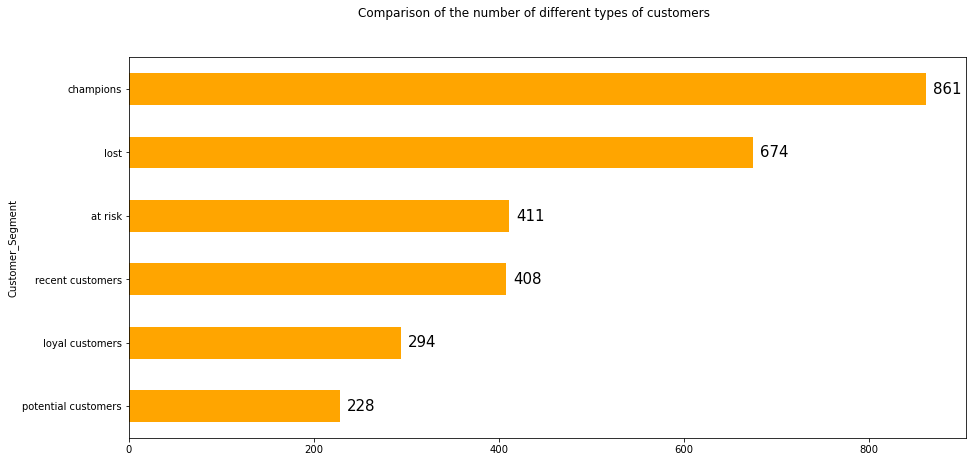

In [93]:
# 不同类型客户的人数对比
fig = plt.figure()
plt.figure(figsize=(15,7))

d1 = rfmTable.groupby(['Customer_Segment']).size().sort_values()
for x,y in enumerate(d1):
    plt.text(y+23,x,y, ha="center",va="center",fontsize=15)    

d1.plot(kind='barh', color='orange')

plt.suptitle('Comparison of the number of different types of customers')

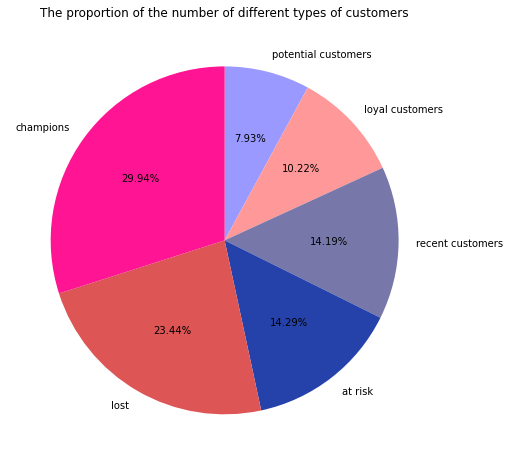

In [99]:
# 不同类型客户人数占比图
labels = ['potential customers', 'loyal customers', 'recent customers', 'at risk', 'lost', 'champions']
colors = ['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555','deeppink']
explode = [0,0,0,0,0,0]

plt.figure(figsize=(12,8))

plt.pie(d1.values,labels=labels,colors=colors,
        explode=explode,startangle=90,counterclock=False, autopct='%1.2f%%')

plt.title("The proportion of the number of different types of customers")
plt.show()

<Figure size 1440x1296 with 0 Axes>

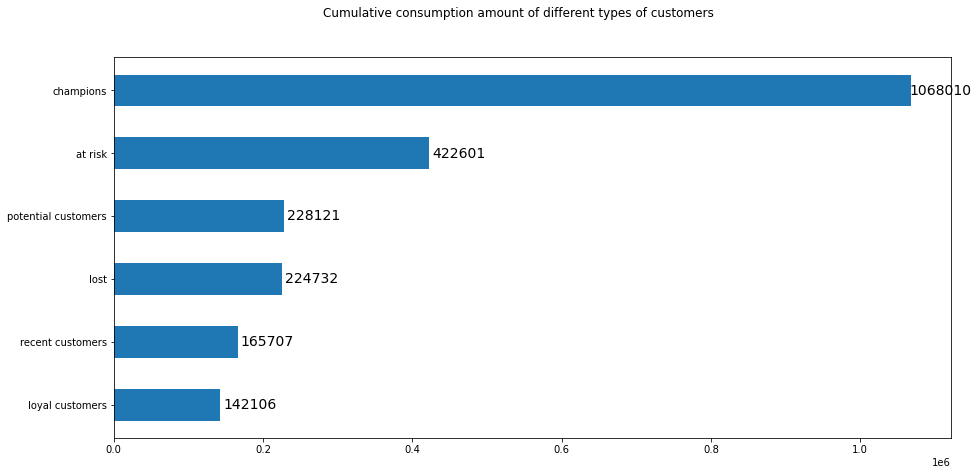

In [100]:
# 不同类型客户累计消费金额
fig = plt.figure()
plt.figure(figsize=(15,7))

d2 = rfmTable.groupby(['Customer_Segment']).agg({"Monetary_value":"sum"})
d2["Monetary_value"] = d2["Monetary_value"].apply(lambda x:round(x))
d2["The proportion of different customers"] = d2["Monetary_value"].apply(lambda x:x/np.sum(d2["Monetary_value"]))
d2 = d2.sort_values(by="Monetary_value",ascending=True)
x = d2.index
y = d2["Monetary_value"]

plt.barh(x,height=0.5,width=y,align="center")
plt.suptitle("Cumulative consumption amount of different types of customers")

for x,y in enumerate(y):
    plt.text(y+40000,x,y,ha="center",va="center",fontsize=14)


Text(0.5, 1.0, 'The proportion of consumption amount of different types of customers')

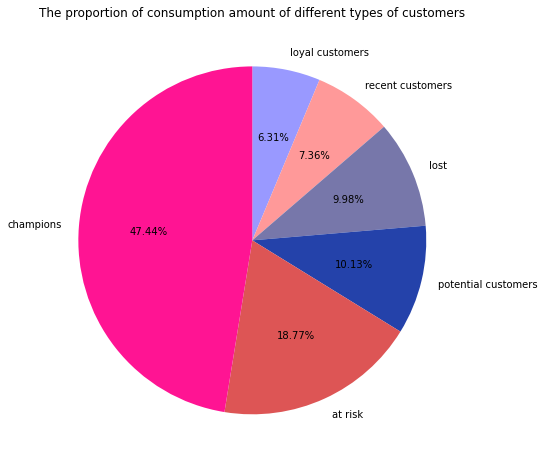

In [101]:
# 不同类型客户金额占比图
d3 = rfmTable.groupby("Customer_Segment").agg({"Monetary_value":"sum"})
d3["Monetary_value"] = d3["Monetary_value"].apply(lambda x:round(x))
d3['The proportion of different customers'] = d3["Monetary_value"].apply(lambda x:x/np.sum(d3["Monetary_value"]))
d3 = d3.sort_values(by="Monetary_value",ascending=True)

plt.figure(figsize=(12,8))
x = d3['The proportion of different customers']

labels = ['loyal customers', 'recent customers', 'lost', 'potential customers', 'at risk', 'champions']
colors = ['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555','deeppink']
explode = [0,0,0,0,0,0]

plt.pie(x, labels=labels, colors=colors,
        explode=explode, startangle=90, counterclock=False, autopct='%1.2f%%')

plt.title("The proportion of consumption amount of different types of customers")


In [138]:
at_risk = pd.read_csv('at_risk.csv')
champions = pd.read_csv('champions.csv')
lost = pd.read_csv('lost.csv')
potential_customers = pd.read_csv('potential_customers.csv')
recent_customers = pd.read_csv('recent_customers.csv')
loyal_customers = pd.read_csv('loyal_customers.csv')

In [139]:
# 删除无用列
at_risk.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)
champions.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)
lost.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)
potential_customers.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)
recent_customers.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)
loyal_customers.drop(['customer_number', 'customer_segment'], axis=1, inplace=True)

In [140]:
print(at_risk.shape)
print(champions.shape)
print(lost.shape)
print(potential_customers.shape)
print(recent_customers.shape)
print(loyal_customers.shape)

(411, 25)
(861, 25)
(674, 25)
(228, 25)
(408, 25)
(294, 25)


In [141]:
def  average_item_spend(group1, group2):
    sum_total_spend = np.sum(group1)
    sum_total_quantity = np.sum(group2)
    average_spend = sum_total_spend / sum_total_quantity
    return average_spend

In [142]:
print('the average item spend of at risk is {:.2f}'.format(average_item_spend(at_risk['total_spend'], at_risk['total_quantity'])))
print('the average item spend of champions is {:.2f}'.format(average_item_spend(champions['total_spend'], champions['total_quantity'])))
print('the average item spend of lost is {:.2f}'.format(average_item_spend(lost['total_spend'], lost['total_quantity'])))
print('the average item spend of potential customers is {:.2f}'.format(average_item_spend(potential_customers['total_spend'], potential_customers['total_quantity'])))
print('the average item spend of recent customers is {:.2f}'.format(average_item_spend(recent_customers['total_spend'], recent_customers['total_quantity'])))
print('the average item spend of loyal customers is {:.2f}'.format(average_item_spend(loyal_customers['total_spend'], loyal_customers['total_quantity'])))

the average item spend of at risk is 1.37
the average item spend of champions is 1.38
the average item spend of lost is 1.27
the average item spend of potential customers is 1.35
the average item spend of recent customers is 1.23
the average item spend of loyal customers is 1.05


In [143]:
# 删除无用列
at_risk.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)
champions.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)
lost.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)
potential_customers.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)
recent_customers.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)
loyal_customers.drop(['total_quantity', 'average_quantity', 'total_spend', 'average_spend'], axis=1, inplace=True)

In [145]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=6)
pca.fit(at_risk)

print(at_risk.columns)
print(pca.components_)

Index(['bakery', 'cashpoint', 'confectionary', 'dairy', 'deli',
       'discount_bakery', 'drinks', 'frozen', 'fruit_veg', 'grocery_food',
       'grocery_health_pets', 'lottery', 'meat', 'newspapers_magazines',
       'practical_items', 'prepared_meals', 'seasonal_gifting', 'soft_drinks',
       'tobacco', 'world_foods', 'baskets'],
      dtype='object')
[[-2.10114276e-02  2.77632311e-02 -3.20001054e-01 -1.31036134e-01
  -2.45607929e-03  1.73081013e-03 -4.68082868e-02 -3.64682534e-02
  -1.37855757e-01 -1.29465776e-01 -6.10465639e-02  8.55887753e-03
  -7.69543110e-02 -1.58566510e-04 -7.06805808e-03 -4.72172223e-02
  -3.57439811e-03 -3.84544236e-02  9.08763196e-01 -6.22067839e-03
   2.32140289e-02]
 [ 3.80846355e-02 -9.14601460e-02  8.39082452e-01  1.40483156e-01
   2.40805135e-03  3.73268591e-04  1.92108974e-01  5.15229293e-02
   1.24924333e-01  1.80414996e-01  7.61712833e-02  1.77659784e-03
   8.89503259e-02  1.03886669e-02  1.55235089e-02  6.93407364e-02
   1.44157569e-02  5.88280651

([<matplotlib.axis.XTick at 0x7fd2a89af310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

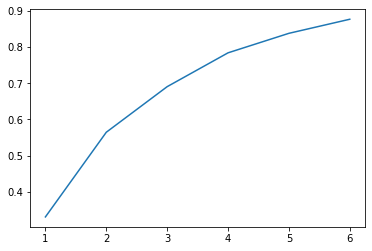

In [146]:
# Compare the performance of different n_components
pca_info = pca.explained_variance_ratio_

pca_info_sum = np.cumsum(pca_info)

plt.plot([1, 2, 3, 4, 5, 6], pca_info_sum)
plt.xticks([1, 2, 3, 4, 5, 6]) 

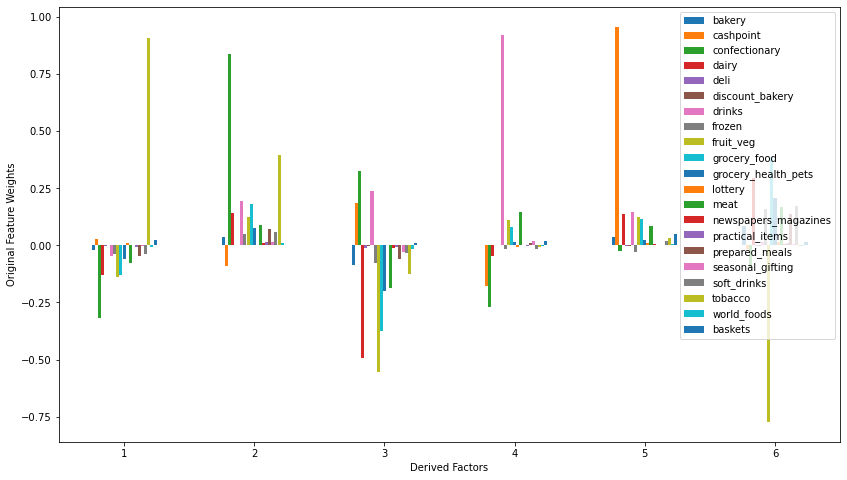

In [148]:
def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pd.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (14,8))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights")
   ax.set_xlabel("Derived Factors")
   ax.set_xticklabels(dimensions, rotation=0)

display_factors(pca, at_risk.columns)

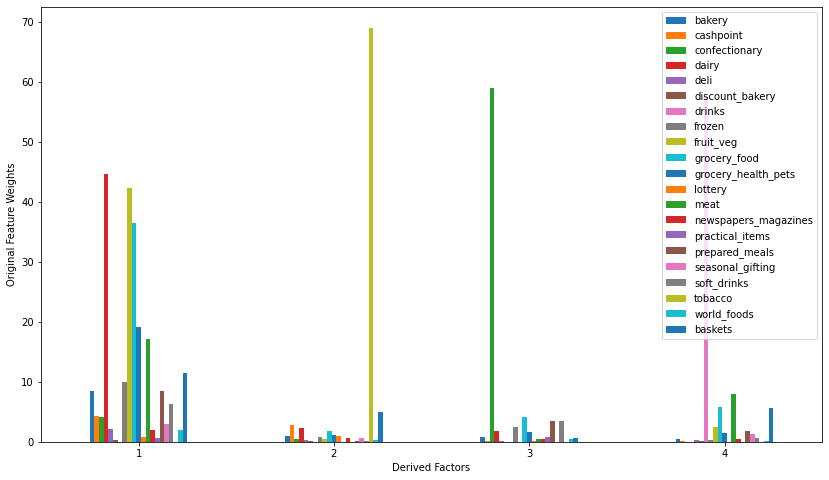

In [149]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(at_risk)

nmf_results = display_factors(nmf, at_risk.columns)

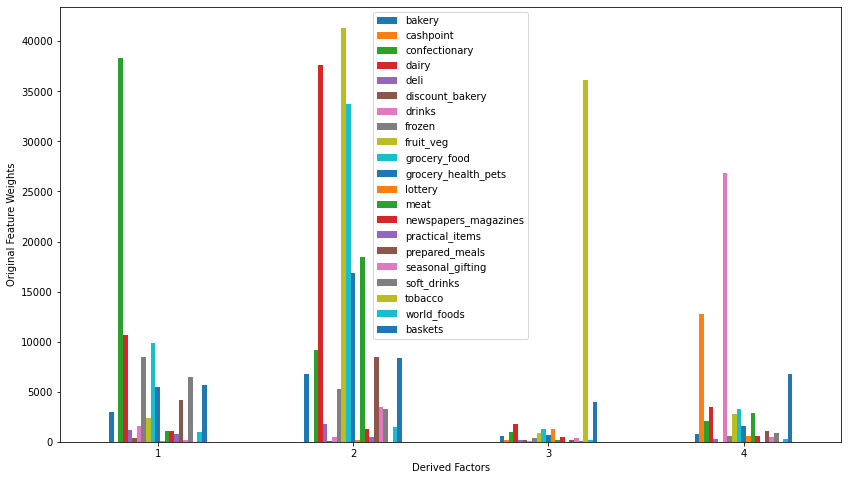

In [150]:
from sklearn.decomposition import LatentDirichletAllocation

#-- generate and visualize and LDA model.
lda = LatentDirichletAllocation(n_components=4, random_state=0)
lda.fit(at_risk)
lda_results = display_factors(lda, at_risk.columns)

In [151]:
# at risk
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, at_risk.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    
    #-- reduce it down to only the top 4 items
    top_3_indeces = reversed_indeces[:3]
    
    #-- print the results out to screen
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))


TOPIC 0
----------
44.63 dairy
42.28 fruit_veg
36.42 grocery_food

TOPIC 1
----------
68.98 tobacco
4.94 baskets
2.74 cashpoint

TOPIC 2
----------
58.97 confectionary
4.06 grocery_food
3.46 prepared_meals

TOPIC 3
----------
57.35 drinks
7.89 meat
5.81 grocery_food


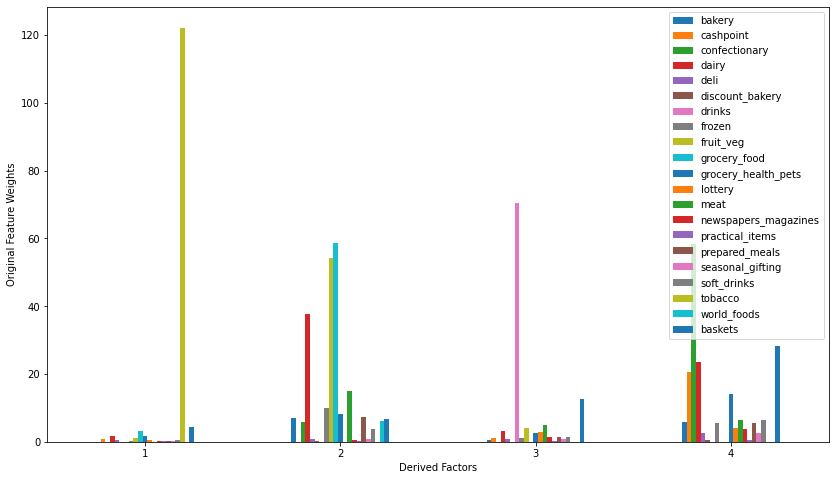

In [152]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(champions)

nmf_results = display_factors(nmf, champions.columns)

In [153]:
# champions
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    weightings = list(zip(topic, champions.columns))
 
    ordered_indeces = topic.argsort()
    
    reversed_indeces = ordered_indeces[::-1]
    
    top_3_indeces = reversed_indeces[:3]
    
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))


TOPIC 0
----------
122.21 tobacco
4.37 baskets
3.14 grocery_food

TOPIC 1
----------
58.73 grocery_food
54.22 fruit_veg
37.73 dairy

TOPIC 2
----------
70.47 drinks
12.67 baskets
5.08 meat

TOPIC 3
----------
58.36 confectionary
28.41 baskets
23.68 dairy


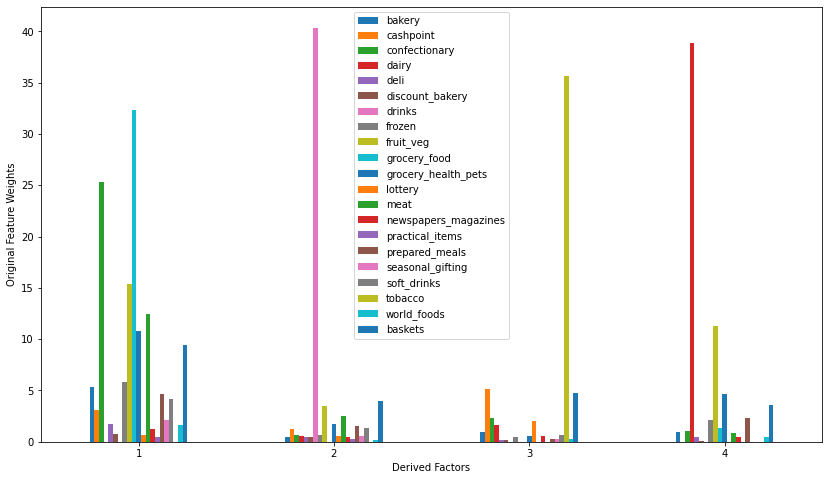

In [154]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(lost)

nmf_results = display_factors(nmf, lost.columns)

In [155]:
# lost
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    weightings = list(zip(topic, lost.columns))
 
    ordered_indeces = topic.argsort()
    
    reversed_indeces = ordered_indeces[::-1]
    
    top_3_indeces = reversed_indeces[:3]
    
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))


TOPIC 0
----------
32.30 grocery_food
25.36 confectionary
15.34 fruit_veg

TOPIC 1
----------
40.35 drinks
4.00 baskets
3.49 fruit_veg

TOPIC 2
----------
35.61 tobacco
5.18 cashpoint
4.78 baskets

TOPIC 3
----------
38.85 dairy
11.25 fruit_veg
4.65 grocery_health_pets


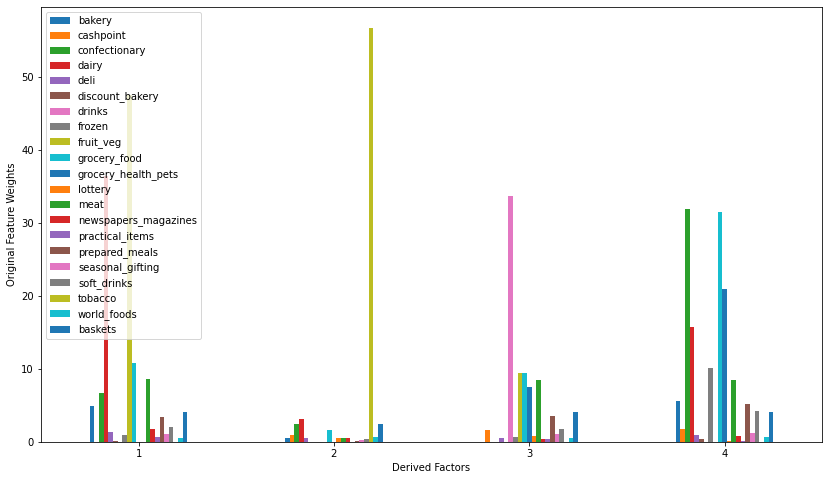

In [156]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(potential_customers)

nmf_results = display_factors(nmf, potential_customers.columns)

In [157]:
# potential_customers
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    weightings = list(zip(topic, potential_customers.columns))
 
    ordered_indeces = topic.argsort()
    
    reversed_indeces = ordered_indeces[::-1]
    
    top_3_indeces = reversed_indeces[:3]
    
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))


TOPIC 0
----------
47.47 fruit_veg
36.38 dairy
10.75 grocery_food

TOPIC 1
----------
56.73 tobacco
3.08 dairy
2.47 baskets

TOPIC 2
----------
33.66 drinks
9.43 fruit_veg
9.38 grocery_food

TOPIC 3
----------
31.86 confectionary
31.41 grocery_food
20.96 grocery_health_pets


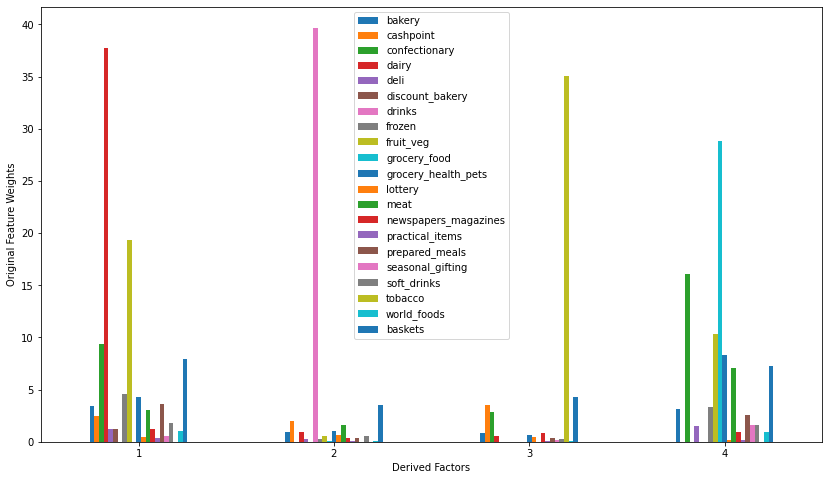

In [158]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(recent_customers)

nmf_results = display_factors(nmf, recent_customers.columns)

In [159]:
# recent_customers
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    weightings = list(zip(topic, recent_customers.columns))
 
    ordered_indeces = topic.argsort()
    
    reversed_indeces = ordered_indeces[::-1]
    
    top_3_indeces = reversed_indeces[:3]
    
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))


TOPIC 0
----------
37.69 dairy
19.34 fruit_veg
9.37 confectionary

TOPIC 1
----------
39.69 drinks
3.55 baskets
2.03 cashpoint

TOPIC 2
----------
35.08 tobacco
4.28 baskets
3.52 cashpoint

TOPIC 3
----------
28.79 grocery_food
16.08 confectionary
10.31 fruit_veg


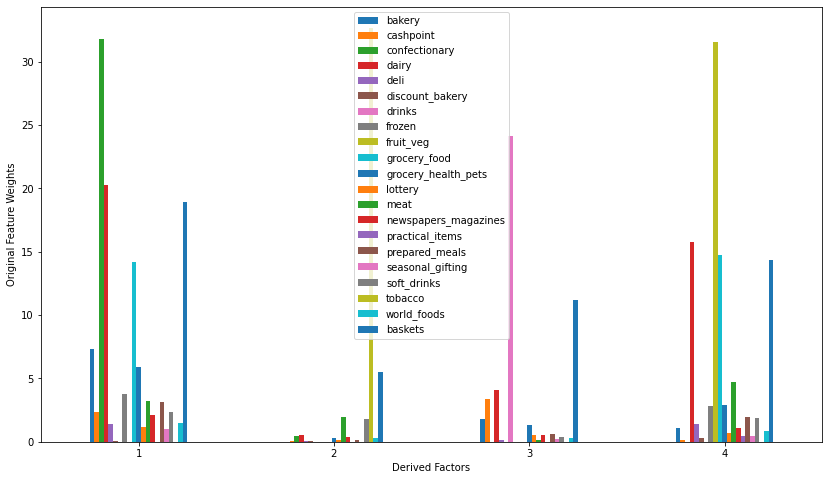

In [160]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=4, random_state=1)
nmf.fit(loyal_customers)

nmf_results = display_factors(nmf, loyal_customers.columns)

In [161]:
# loyal_customers
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    weightings = list(zip(topic, loyal_customers.columns))
 
    ordered_indeces = topic.argsort()
    
    reversed_indeces = ordered_indeces[::-1]
    
    top_3_indeces = reversed_indeces[:3]
    
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))



TOPIC 0
----------
31.77 confectionary
20.23 dairy
18.89 baskets

TOPIC 1
----------
32.68 tobacco
5.52 baskets
1.94 meat

TOPIC 2
----------
24.16 drinks
11.20 baskets
4.07 dairy

TOPIC 3
----------
31.52 fruit_veg
15.78 dairy
14.76 grocery_food
